In [3]:
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
import pandas as pd
import datetime as dt
import pytz
from jdatetime import datetime, date

In [4]:
# Connect to the database
cnx = mysql.connector.connect(
    host="localhost",
    user="newuser",
    password="12345678",
    database="laptop_analysis_and_warehousing"
)

cursor = cnx.cursor()

In [5]:
query = """
SELECT EXTRACT(MONTH FROM STR_TO_DATE(Order_Date, '%Y-%m-%d')) AS month,
       SUM(Total_Price)                                             AS total_price
FROM `order`
GROUP BY month
order by month
"""

cursor.execute(query)
results = cursor.fetchall()

months = []
total_prices = []

for row in results:
    month = row[0]
    total_price = row[1]
    months.append(month)
    total_prices.append(total_price)

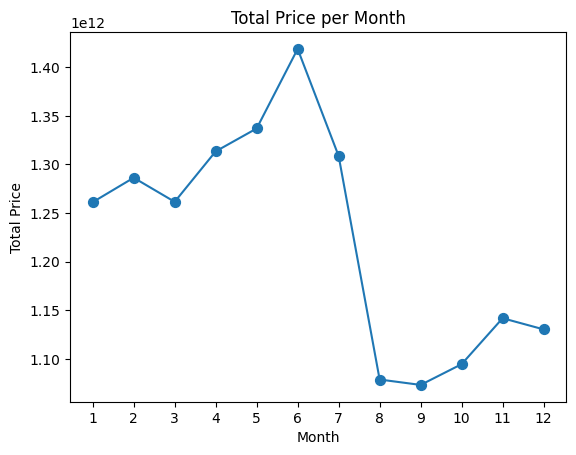

In [6]:
months = [int(month) for month in months]

# Plot the data as circles
plt.scatter(months, total_prices, marker='o', s=50)
plt.plot(months, total_prices, '-')
# Set x-axis ticks based on the range of months
plt.xticks(range(min(months), max(months) + 1))

plt.xlabel('Month')
plt.ylabel('Total Price')
plt.title('Total Price per Month')
plt.show()

In [7]:
query = """
SELECT o.Order_id,
       o.laptop_id,
       o.Order_Date,
       o.Total_Price,
       o.Quantity
FROM `order` o
         JOIN laptop l ON o.laptop_id = l.laptop_id
"""
data = pd.read_sql_query(query, cnx)
data
# # Convert Order_Date column to datetime
# data['Order_Date'] = pd.to_datetime(data['Order_Date'])
# data
# # Calculate RFM values
# snapshot_date = data['Order_Date'].max() + pd.DateOffset(days=1)
# data['Recency'] = (snapshot_date - data['Order_Date']).dt.days
# data['Frequency'] = data.groupby('laptop_id')['Order_id'].transform('nunique')
# data['Monetary'] = data.groupby('laptop_id')['Total_Price'].transform('sum')

# # Calculate RFM scores
# r_bins = pd.qcut(data['Recency'], q=4, labels=False)
# f_bins = pd.qcut(data['Frequency'], q=4, labels=False)
# m_bins = pd.qcut(data['Monetary'], q=4, labels=False)
# data['R'] = 4 - r_bins
# data['F'] = f_bins + 1
# data['M'] = m_bins + 1

# # Analyze RFM segments
# rfm_scores = data.groupby('laptop_id').agg({
#     'R': 'min',
#     'F': 'max',
#     'M': 'max'
# }).reset_index()

# # Print the RFM scores
# print(rfm_scores)

# # Close the database connection
# cnx.close()

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_932\2372145669.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, cnx)


,Order_id,laptop_id,Order_Date,Total_Price,Quantity
0,0,0,1396-10-26,3450000.0,1
1,20,0,1391-01-20,1100000.0,1
2,72,0,1401-02-09,15580000.0,1
3,204,0,1400-05-25,20150000.0,1
4,297,0,1397-02-30,4250000.0,1
...,...,...,...,...,...
1017076,926808,42351,1394-12-24,1150000.0,1
1017077,944117,42351,1396-07-15,1350000.0,1
1017078,987849,42351,1401-11-25,15150000.0,1
1017079,1006977,42351,1401-05-27,8950000.0,1


In [8]:
data[data['Quantity'] == 2]

,Order_id,laptop_id,Order_Date,Total_Price,Quantity
7,647,0,1396-05-09,5300000.0,2
10,851,0,1392-11-15,3895000.0,2
56,3781,0,1399-11-30,33400000.0,2
61,4054,0,1397-05-14,14400000.0,2
88,6173,0,1391-05-14,2700000.0,2
...,...,...,...,...,...
1017019,367453,42351,1400-07-08,19700000.0,2
1017021,449735,42351,1398-02-07,9500000.0,2
1017054,767037,42351,1396-11-29,3100000.0,2
1017065,834709,42351,1394-05-19,2400000.0,2


In [9]:
dt.timedelta()

datetime.timedelta(0)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017081 entries, 0 to 1017080
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Order_id     1017081 non-null  int64  
 1   laptop_id    1017081 non-null  int64  
 2   Order_Date   1017081 non-null  object 
 3   Total_Price  1017081 non-null  float64
 4   Quantity     1017081 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 38.8+ MB


In [11]:
data[data['Quantity'] == 2]

,Order_id,laptop_id,Order_Date,Total_Price,Quantity
7,647,0,1396-05-09,5300000.0,2
10,851,0,1392-11-15,3895000.0,2
56,3781,0,1399-11-30,33400000.0,2
61,4054,0,1397-05-14,14400000.0,2
88,6173,0,1391-05-14,2700000.0,2
...,...,...,...,...,...
1017019,367453,42351,1400-07-08,19700000.0,2
1017021,449735,42351,1398-02-07,9500000.0,2
1017054,767037,42351,1396-11-29,3100000.0,2
1017065,834709,42351,1394-05-19,2400000.0,2


In [12]:
data['Order_Date'] = data['Order_Date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").togregorian().strftime("%Y-%m-%d"))
data

,Order_id,laptop_id,Order_Date,Total_Price,Quantity
0,0,0,2018-01-16,3450000.0,1
1,20,0,2012-04-08,1100000.0,1
2,72,0,2022-04-29,15580000.0,1
3,204,0,2021-08-16,20150000.0,1
4,297,0,2018-05-20,4250000.0,1
...,...,...,...,...,...
1017076,926808,42351,2016-03-14,1150000.0,1
1017077,944117,42351,2017-10-07,1350000.0,1
1017078,987849,42351,2023-02-14,15150000.0,1
1017079,1006977,42351,2022-08-18,8950000.0,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017081 entries, 0 to 1017080
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Order_id     1017081 non-null  int64  
 1   laptop_id    1017081 non-null  int64  
 2   Order_Date   1017081 non-null  object 
 3   Total_Price  1017081 non-null  float64
 4   Quantity     1017081 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 38.8+ MB


In [14]:
data[data['Quantity'] == 4]

,Order_id,laptop_id,Order_Date,Total_Price,Quantity
335,23382,0,2017-04-20,7800000.0,4
478,30665,0,2012-10-31,7056000.0,4
1108,75173,0,2013-05-16,7600000.0,4
1495,103022,0,2015-08-15,10192000.0,4
2516,169860,0,2020-02-20,37400000.0,4
...,...,...,...,...,...
1014038,792314,13599,2014-02-19,6600000.0,4
1014887,188590,15433,2021-05-19,22600000.0,4
1016388,172534,24283,2019-06-21,15600000.0,4
1016962,719699,40537,2020-03-24,157400000.0,4


In [15]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017081 entries, 0 to 1017080
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Order_id     1017081 non-null  int64         
 1   laptop_id    1017081 non-null  int64         
 2   Order_Date   1017081 non-null  datetime64[ns]
 3   Total_Price  1017081 non-null  float64       
 4   Quantity     1017081 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 38.8 MB


In [17]:
pin_date = max(data['Order_Date']) + dt.timedelta(1)
pin_date

Timestamp('2023-10-12 00:00:00')

In [18]:
data[data['Quantity'] == 6]

,Order_id,laptop_id,Order_Date,Total_Price,Quantity
135032,726396,31,2023-03-21,240219000.0,6
140059,181936,34,2022-09-30,207300000.0,6
380963,651422,91,2016-08-01,20400000.0,6
393395,979846,94,2013-06-25,21900000.0,6
519453,567144,189,2020-07-18,137100000.0,6
551847,885548,211,2022-12-16,167400000.0,6
592918,295701,250,2012-08-15,9600000.0,6
620534,177038,288,2017-10-18,26400000.0,6
676873,656299,361,2023-09-18,348900000.0,6
680094,56162,368,2020-03-23,69090000.0,6


In [19]:
data['Order_Month'] = data['Order_Date'].dt.month

In [20]:
data

,Order_id,laptop_id,Order_Date,Total_Price,Quantity,Order_Month
0,0,0,2018-01-16,3450000.0,1,1
1,20,0,2012-04-08,1100000.0,1,4
2,72,0,2022-04-29,15580000.0,1,4
3,204,0,2021-08-16,20150000.0,1,8
4,297,0,2018-05-20,4250000.0,1,5
...,...,...,...,...,...,...
1017076,926808,42351,2016-03-14,1150000.0,1,3
1017077,944117,42351,2017-10-07,1350000.0,1,10
1017078,987849,42351,2023-02-14,15150000.0,1,2
1017079,1006977,42351,2022-08-18,8950000.0,1,8


In [21]:
rfm = data.groupby('Order_Month').agg({
    'Order_Date': lambda x: (pin_date.to_period('M') - x.max().to_period('M')).n,
    'Quantity': 'count',
    'Total_Price': 'sum'
}).reset_index()
rfm

,Order_Month,Order_Date,Quantity,Total_Price
0,1,9,87029,1.145013e+12
1,2,8,79426,1.077731e+12
2,3,7,87194,1.234155e+12
3,4,6,84290,1.225534e+12
4,5,5,87019,1.274315e+12
5,6,4,84393,1.237921e+12
6,7,3,87395,1.313936e+12
7,8,2,87397,1.356081e+12
8,9,1,84453,1.400308e+12
9,10,0,82710,1.251155e+12


In [22]:
rfm.rename(columns= {
    'Order_Date': 'Recency',
    'Quantity': 'Frequency',
    'Total_Price': 'Monetary'
}, inplace=True)
rfm

,Order_Month,Recency,Frequency,Monetary
0,1,9,87029,1.145013e+12
1,2,8,79426,1.077731e+12
2,3,7,87194,1.234155e+12
3,4,6,84290,1.225534e+12
4,5,5,87019,1.274315e+12
5,6,4,84393,1.237921e+12
6,7,3,87395,1.313936e+12
7,8,2,87397,1.356081e+12
8,9,1,84453,1.400308e+12
9,10,0,82710,1.251155e+12


In [23]:
rfm['Recency'].unique()

array([ 9,  8,  7,  6,  5,  4,  3,  2,  1,  0, 11, 10], dtype=int64)

In [24]:
r_labels = range(4, 0, -1) #[4, 3, 2, 1]
r_groups = pd.qcut(rfm['Recency'], q=4, labels=r_labels)
f_labels = range(1, 5)
f_groups = pd.qcut(rfm['Frequency'], q=4, labels=f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(rfm['Monetary'], q=4, labels=m_labels)

In [25]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values
rfm

,Order_Month,Recency,Frequency,Monetary,R,F,M
0,1,9,87029,1.145013e+12,1,3,2
1,2,8,79426,1.077731e+12,2,1,1
2,3,7,87194,1.234155e+12,2,4,2
3,4,6,84290,1.225534e+12,2,2,2
4,5,5,87019,1.274315e+12,3,3,3
5,6,4,84393,1.237921e+12,3,2,3
6,7,3,87395,1.313936e+12,3,4,4
7,8,2,87397,1.356081e+12,4,4,4
8,9,1,84453,1.400308e+12,4,2,4
9,10,0,82710,1.251155e+12,4,1,3


In [26]:
data[data['Order_Month'] == 11]

,Order_id,laptop_id,Order_Date,Total_Price,Quantity,Order_Month
5,422,0,2013-11-17,2400000.0,1,11
20,1266,0,2014-11-07,2300000.0,1,11
59,4022,0,2014-11-13,2350000.0,1,11
76,5503,0,2014-11-17,2550000.0,1,11
92,6341,0,2019-11-12,7517500.0,1,11
...,...,...,...,...,...,...
1017006,129083,42351,2013-11-07,1050000.0,1,11
1017020,440946,42351,2022-11-13,11907000.0,1,11
1017051,732163,42351,2015-11-08,1200000.0,1,11
1017053,760724,42351,2017-11-02,1302000.0,1,11


In [27]:
data[data['Order_Month'] == 11]['Total_Price'].sum()

1075447001500.0

In [28]:
df = pd.DataFrame(rfm, columns=rfm.columns)
# st.title('Request 4')
# st.table(df)
df.to_csv('request6.csv', encoding='utf-8', index=False)